In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# -------------------------
# IMPORTS
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# -------------------------
# EXTRACT
# -------------------------
df = pd.read_csv("/content/drive/My Drive/Stats_Python/shopping_behavior_updated.csv")

# -------------------------
# INITIAL EDA (PROFILING)
# -------------------------
print(df.head())
print(df.info())
print(df.describe(include="all"))

# Missing values
print("\nMissing values per column:\n", df.isna().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [6]:
Q1 = df["Purchase Amount (USD)"].quantile(0.25)
Q3 = df["Purchase Amount (USD)"].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (
    (df["Purchase Amount (USD)"] < Q1 - 1.5 * IQR) |
    (df["Purchase Amount (USD)"] > Q3 + 1.5 * IQR)
)

# Remove outliers
df = df[~outlier_mask]

In [7]:
print("Inspecting categorical columns for consistency...")

categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) == 0:
    print("No categorical columns found in the DataFrame.")
else:
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_values}")

Inspecting categorical columns for consistency...

Column: Gender
Unique values: ['Male' 'Female']

Column: Item Purchased
Unique values: ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']

Column: Category
Unique values: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

Column: Location
Unique values: ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'S

In [8]:
# Mapping of full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Apply the mapping to the 'Location' column
df['Location'] = df['Location'].map(state_abbreviations)

print("Updated unique values in 'Location' column after abbreviation:")
print(df['Location'].unique())


Updated unique values in 'Location' column after abbreviation:
['KY' 'ME' 'MA' 'RI' 'OR' 'WY' 'MT' 'LA' 'WV' 'MO' 'AR' 'HI' 'DE' 'NH'
 'NY' 'AL' 'MS' 'NC' 'CA' 'OK' 'FL' 'TX' 'NV' 'KS' 'CO' 'ND' 'IL' 'IN'
 'AZ' 'AK' 'TN' 'OH' 'NJ' 'MD' 'VT' 'NM' 'SC' 'ID' 'PA' 'CT' 'UT' 'VA'
 'GA' 'NE' 'IA' 'SD' 'MN' 'WA' 'WI' 'MI']


In [9]:
df_raw = pd.read_csv("/content/drive/My Drive/Stats_Python/shopping_behavior_updated.csv")
VALID_GENDERS = ['Male', 'Female']

audit = {
    "Raw rows": len(df_raw),
    "Rows after cleaning": len(df),
    "Duplicates removed": df_raw.duplicated().sum(),
    "Outliers removed": outlier_mask.sum(),
    "Missing values filled": df_raw.isna().sum().sum(),
    "Invalid genders removed":
        (~df_raw["Gender"].isin(VALID_GENDERS)).sum()
}

print(audit)

{'Raw rows': 3900, 'Rows after cleaning': 3900, 'Duplicates removed': np.int64(0), 'Outliers removed': np.int64(0), 'Missing values filled': np.int64(0), 'Invalid genders removed': np.int64(0)}


In [10]:
top_10_items = df['Item Purchased'].value_counts().head(10)
print("Top 10 Most Purchased Items:")
print(top_10_items)


Top 10 Most Purchased Items:
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64


In [11]:
df.to_csv("clean_consumer_data.csv", index=False)

#Predictive: How does the season impact the consumers buying habit and will clothing pieces be bought more in a specific season?

Analyse seasonal item purchases, visualize the preferences, and summarize how seasons impact consumer buying habits, specifically highlighting clothing pieces that show a significant increase in purchases during certain seasons using the df DataFrame.

First the DataFrame was grouped by 'Season' and 'Item Purchased' and the number of purchases for each item within each season was counted. This will reveal which items are most popular during different times of the year.


In [ ]:
seasonal_purchases = df.groupby(['Season', 'Item Purchased']).size().reset_index(name='Purchase Count')
print(seasonal_purchases.head())

  Season Item Purchased  Purchase Count
0   Fall       Backpack              34
1   Fall           Belt              41
2   Fall         Blouse              42
3   Fall          Boots              35
4   Fall           Coat              34


To further analyse and identify the most popular items within each season, the next step was to find the top item purchased for each season.  



In [ ]:
seasonal_top_items = seasonal_purchases.loc[seasonal_purchases.groupby('Season')['Purchase Count'].idxmax()]
print("Top Purchased Item for Each Season:")
print(seasonal_top_items)

Top Purchased Item for Each Season:
    Season Item Purchased  Purchase Count
10    Fall         Jacket              54
48  Spring        Sweater              52
63  Summer          Pants              50
97  Winter     Sunglasses              52


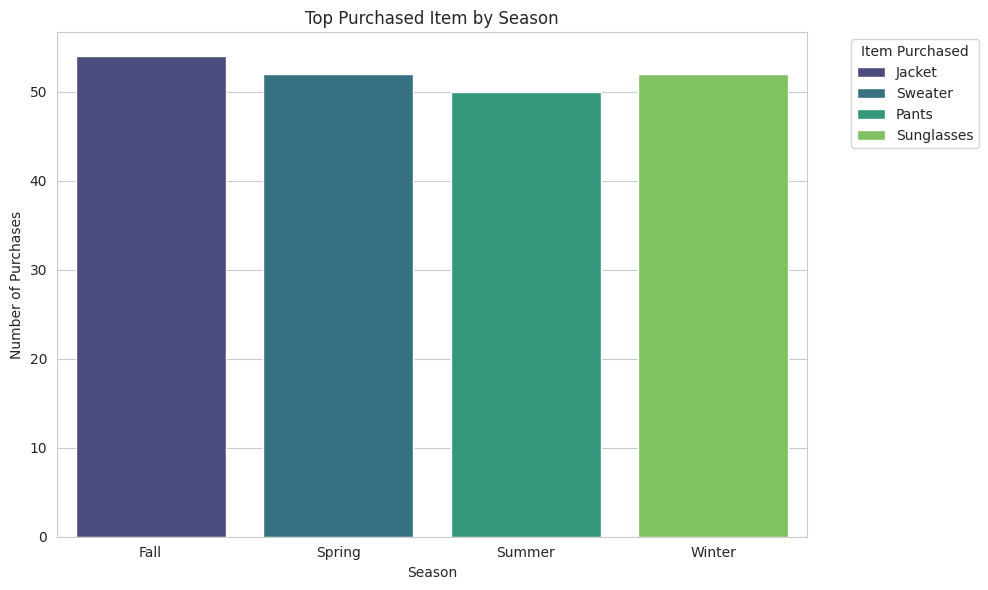


Summary of Seasonal Item Preferences:
During Fall, the most purchased item was Jacket with 54 purchases.
During Spring, the most purchased item was Sweater with 52 purchases.
During Summer, the most purchased item was Pants with 50 purchases.
During Winter, the most purchased item was Sunglasses with 52 purchases.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Purchase Count', hue='Item Purchased', data=seasonal_top_items, palette='viridis')
plt.title('Top Purchased Item by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nSummary of Seasonal Item Preferences:")
for index, row in seasonal_top_items.iterrows():
    print(f"During {row['Season']}, the most purchased item was {row['Item Purchased']} with {row['Purchase Count']} purchases.")


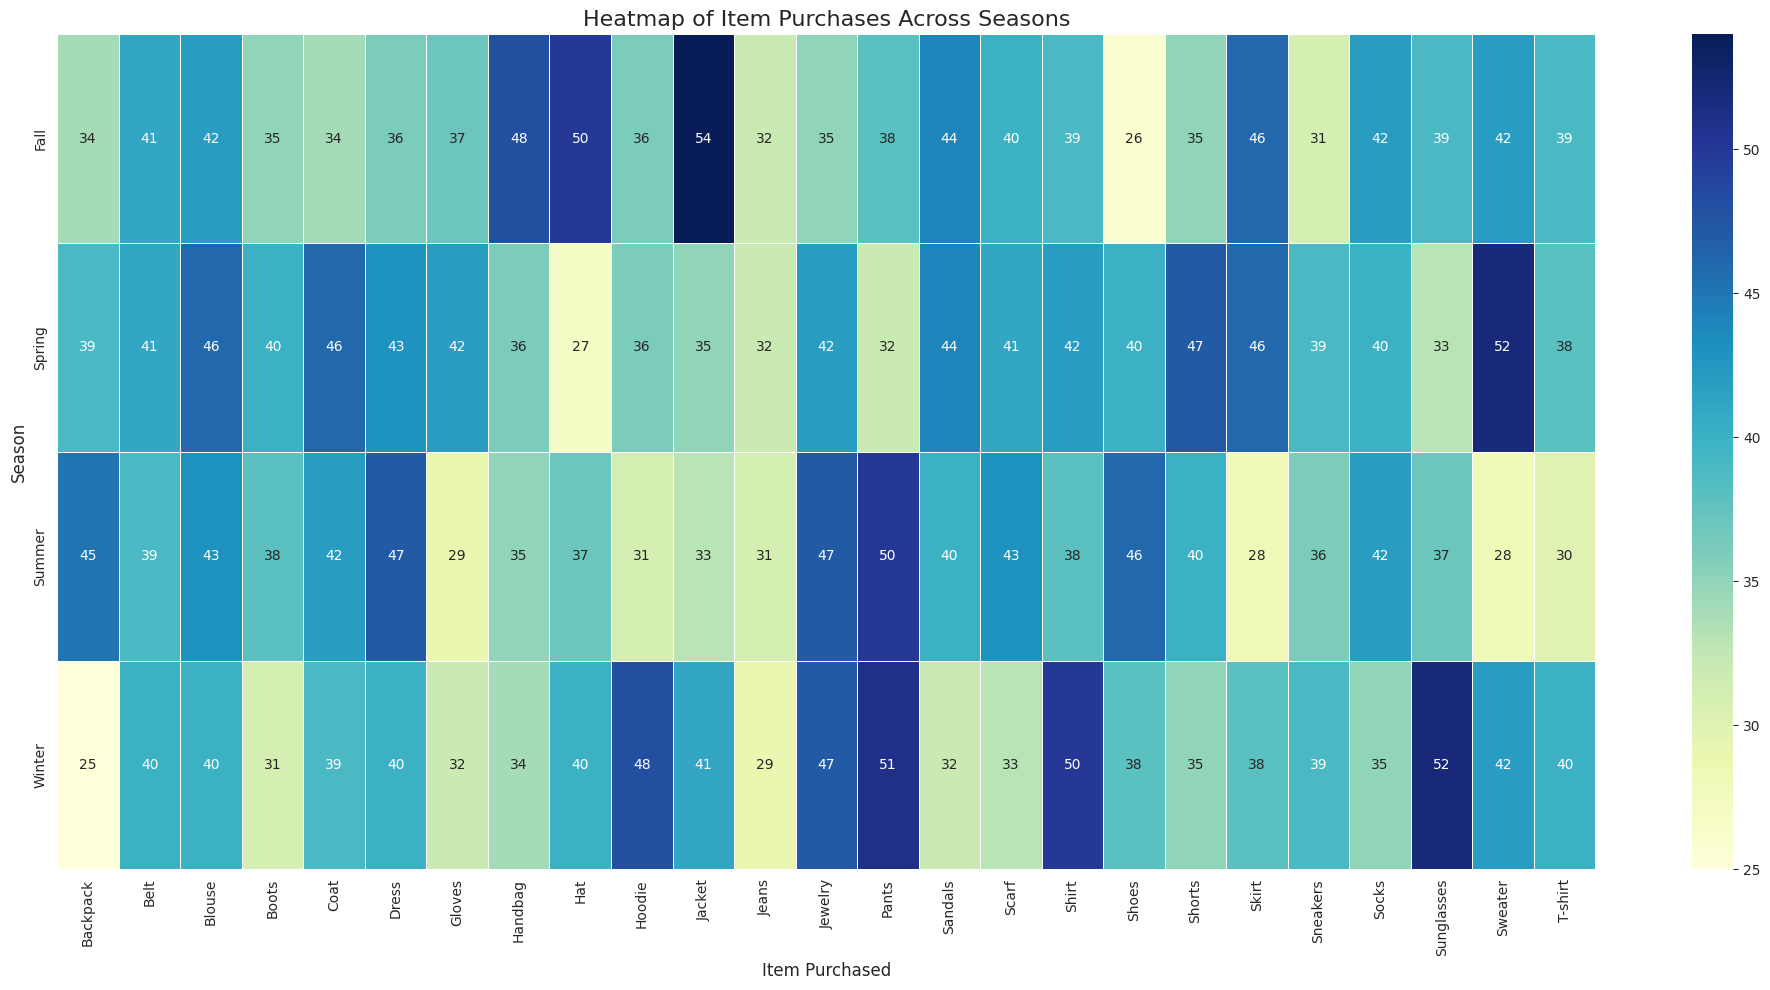

In [ ]:
seasonal_pivot_df = seasonal_purchases.pivot_table(
    index='Season',
    columns='Item Purchased',
    values='Purchase Count'
).fillna(0)

plt.figure(figsize=(20, 10)) # Adjust figure size for better readability of the heatmap
sns.heatmap(
    seasonal_pivot_df,
    annot=True,     # Show the purchase counts on the heatmap
    fmt=".0f",      # Format annotations as integers
    cmap="YlGnBu",  # Choose a color map for intensity (Yellow-Green-Blue)
    linewidths=.5   # Add lines between cells for better separation
)
plt.title('Heatmap of Item Purchases Across Seasons', fontsize=16)
plt.xlabel('Item Purchased', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.tight_layout()
plt.show()

##Summary of Seasonal Impact

From the bar chart of the top purchased items per season and the overall heatmap, we can see the following:

    Fall: Jackets show the most purchases, making them the top item.  

This could, aligns with consumers preparing for cooler weather.  

    Spring: Sweaters are the most purchased item.

This might suggest a demand for transition-period clothing as the weather begins to warm but can still be chilly.  

    Summer: Pants are the leading purchase.

Which might seem counterintuitive but could reflect a shift towards lighter materials or specific types of pants. Although this is just an assumption and not provable from the dataset.  

    Winter: Sunglasses surprisingly emerge as the top purchased item.  

This could be due to factors like winter sports or holiday gifts.

##Hypothesis Testing for Seasonal Influence on Categories

To assess if there is a significant association between the 'Season' and the 'Category' of the item purchased, a Chi-squared test was performed. This formally tested the hypothesis that purchasing patterns for different clothing categories vary by season.

To perform the Chi-squared test (statistical hypothesis test), first a contingency table between 'Season' and 'Category' was created. This table served as the input for the chi-squared test.


In [ ]:
contingency_table = pd.crosstab(df['Season'], df['Category'])
print("Contingency Table (Season vs. Category):")
print(contingency_table)

Contingency Table (Season vs. Category):
Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall              324       427       136         88
Spring            301       454       163         81
Summer            312       408       160         75
Winter            303       448       140         80


Now that the contingency table was created, the chi2_contingency function could be applied, and the results could be interpreted based on the p-value.



In [ ]:
from scipy.stats import chi2_contingency

# Perform the Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant association between 'Season' and 'Category' of item purchased.")
    print("This implies that purchasing patterns for different clothing categories vary significantly by season.")
else:
    print(f"Since the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant association between 'Season' and 'Category' of item purchased.")
    print("This implies that purchasing patterns for different clothing categories do not vary significantly by season.")

Chi-squared Statistic: 7.93
P-value: 0.541
Degrees of Freedom: 9

Interpretation:
Since the p-value (0.541) is greater than the significance level (0.05), we fail to reject the null hypothesis.
There is no statistically significant association between 'Season' and 'Category' of item purchased.
This implies that purchasing patterns for different clothing categories do not vary significantly by season.


##Hypothesis Testing for Seasonal Influence on Categories

Since Jackets are bought most in Fall but the Hypothesis Testing about the association between ‘Season’ and ‘Category’ was not significant. A second Chi-squared test was conducted to check the if there was an association between ‘Season’ and the purchase of the item ‘Jacket’.

In [ ]:
from scipy.stats import chi2_contingency

# Choose a specific item for hypothesis testing
specific_item = 'Jacket'

# Create a new column indicating if the specific item was purchased
df['Is_Specific_Item_Purchased'] = df['Item Purchased'].apply(lambda x: 1 if x == specific_item else 0)

# Create a contingency table for 'Season' and 'Is_Specific_Item_Purchased'
contingency_table_item = pd.crosstab(df['Season'], df['Is_Specific_Item_Purchased'])

print(f"Contingency Table (Season vs. {specific_item} Purchase):")
print(contingency_table_item)

# Perform the Chi-squared test
chi2_item, p_value_item, dof_item, expected_item = chi2_contingency(contingency_table_item)

print(f"\nChi-squared Statistic for {specific_item}: {chi2_item:.2f}")
print(f"P-value for {specific_item}: {p_value_item:.3f}")
print(f"Degrees of Freedom for {specific_item}: {dof_item}")

# Interpret the results
alpha = 0.05
print("\nInterpretation:")
if p_value_item < alpha:
    print(f"Since the p-value ({p_value_item:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print(f"There is a statistically significant association between 'Season' and the purchase of '{specific_item}'.")
    print(f"This implies that the purchasing patterns for '{specific_item}' vary significantly by season.")
else:
    print(f"Since the p-value ({p_value_item:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print(f"There is no statistically significant association between 'Season' and the purchase of '{specific_item}'.")
    print(f"This implies that the purchasing patterns for '{specific_item}' do not vary significantly by season.")

Contingency Table (Season vs. Jacket Purchase):
Is_Specific_Item_Purchased    0   1
Season                             
Fall                        921  54
Spring                      964  35
Summer                      922  33
Winter                      930  41

Chi-squared Statistic for Jacket: 6.89
P-value for Jacket: 0.075
Degrees of Freedom for Jacket: 3

Interpretation:
Since the p-value (0.075) is greater than the significance level (0.05), we fail to reject the null hypothesis.
There is no statistically significant association between 'Season' and the purchase of 'Jacket'.
This implies that the purchasing patterns for 'Jacket' do not vary significantly by season.


##Conclusion and Key Findings

A Chi-squared hypothesis test was performed to assess the association between 'Season' and 'Category' of purchased items. The test showed a Chi-squared Statistic of 7.93 and a P-value of 0.541.



Given a significance level of 0.05, the P-value (0.541) was greater than the alpha, leading to the conclusion that there is no statistically significant association between 'Season' and 'Category'.



The lack of a significant association between 'Season' and 'Category' challenges the assumption that seasons heavily dictate clothing category purchases in specific seasons. Also, when looking at a specific ‘Item purchased’ like jackets, there is no significant association. This suggests that other factors might be more influential, or that seasonal influence is more nuanced.